In [1]:
%%time
import pandas as pd
import json
import gzip
import IPython.display as display
display.clear_output()

CPU times: user 697 ms, sys: 1.1 s, total: 1.8 s
Wall time: 3.52 s


## Data load
Read variant data; Data obtained by directly querying the opencga variant storage engine; Command used:
```bash
opencga.sh variant query --of JSON --limit 10000 --study wilson@agvp:1kgp3 --region chr1 --include-sample all --sample-metadata --exclude annotation --sample-limit 999999 --type SNV > variants_1kgp3_chr1.json
```

In [2]:
%%time
data = json.load(open('variants_1kgp3_chr1.json'))

CPU times: user 3min 49s, sys: 28.9 s, total: 4min 18s
Wall time: 4min 18s


In [8]:
%%time
# data2 = json.loads(line for line in open('all_variants_h3awgs.json'))
data2 = [json.loads(line) for line in open('all_variants_h3awgs.json', 'r')]


CPU times: user 1min 18s, sys: 11.9 s, total: 1min 30s
Wall time: 1min 30s


In [14]:
len(data2)

8

In [26]:
len(data2[0][0]['attributes']['samples']["wilson@agvp:1kgp3"])

2504

In [11]:
len(data3)

0

## Get variant sample ids

In [3]:
%%time
samples = data[0]['attributes']['samples']["wilson@agvp:1kgp3"]

CPU times: user 9 µs, sys: 1 µs, total: 10 µs
Wall time: 16.2 µs


## Get variant genotypes

In [4]:
%%time
GTs = list(map(lambda y: {y['id']: list(map(lambda x: x['data'][0],y['studies'][0]['samples']))}  ,data[0]['results']))

CPU times: user 16.4 s, sys: 666 ms, total: 17 s
Wall time: 17 s


In [5]:
len(GTs)

20000

## Create a pandas dataframe
Use the sample ids as the columns and the variant ids as the indexes

In [6]:
%%time
df = pd.DataFrame(map(lambda x: x.values(),GTs), index=map(lambda x: list(x.keys())[0], GTs), columns=['GTs'])
gt_df = pd.DataFrame(df["GTs"].to_list(), index=df.index.to_list(), columns=samples)
gt_df.head()

CPU times: user 22.6 s, sys: 1.02 s, total: 23.6 s
Wall time: 23.7 s


,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00105,HG00106,HG00107,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
1:10505:A:T,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
1:10506:C:G,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
1:10511:G:A,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
1:10539:C:A,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
1:10542:C:T,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0


## Transpose the dataframe
Reason ? to make it easier to annotate the df with the meta data

In [7]:
%%time
trans_df = gt_df.transpose()
trans_df.head()

CPU times: user 836 ms, sys: 94.9 ms, total: 931 ms
Wall time: 905 ms


,1:10505:A:T,1:10506:C:G,1:10511:G:A,1:10539:C:A,1:10542:C:T,1:10579:C:A,1:10642:G:A,1:11008:C:G,1:11012:C:G,1:11063:T:G,...,1:1174873:G:T,1:1174878:G:A,1:1174879:G:A,1:1174934:T:C,1:1174954:T:C,1:1174957:C:T,1:1174966:C:T,1:1174968:C:T,1:1175004:G:A,1:1175024:C:T
HG00096,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0|1,0/0,0/0,0/0,0/0,0/0
HG00097,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
HG00099,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
HG00100,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
HG00101,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0


## Read Meta data 
Make a dataframe from the metadata and clean it

In [8]:
meta = pd.read_table('integrated_call_samples_v3.20130502.ALL.panel', index_col='sample')

In [9]:
meta.columns
meta = meta.drop(['Unnamed: 4', 'Unnamed: 5'], axis=1)
meta.head()

,pop,super_pop,gender
sample,,,
HG00096,GBR,EUR,male
HG00097,GBR,EUR,female
HG00099,GBR,EUR,female
HG00100,GBR,EUR,female
HG00101,GBR,EUR,male


In [10]:
meta.shape, trans_df.shape

((2504, 3), (2504, 20000))

## Annotate the variant dataframe
Merge the variant df with the meta df

In [11]:
%%time
annotate = pd.merge(meta, trans_df, left_index=True, right_index=True)
annotate.head()

CPU times: user 8.37 s, sys: 1.31 s, total: 9.68 s
Wall time: 9.63 s


,pop,super_pop,gender,1:10505:A:T,1:10506:C:G,1:10511:G:A,1:10539:C:A,1:10542:C:T,1:10579:C:A,1:10642:G:A,...,1:1174873:G:T,1:1174878:G:A,1:1174879:G:A,1:1174934:T:C,1:1174954:T:C,1:1174957:C:T,1:1174966:C:T,1:1174968:C:T,1:1175004:G:A,1:1175024:C:T
sample,,,,,,,,,,,,,,,,,,,,,
HG00096,GBR,EUR,male,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0|1,0/0,0/0,0/0,0/0,0/0
HG00097,GBR,EUR,female,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
HG00099,GBR,EUR,female,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
HG00100,GBR,EUR,female,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
HG00101,GBR,EUR,male,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0


## Encode variant data
Perform a one hot encoding on the variant data

In [12]:
%%time
one_hot_data = pd.get_dummies(annotate.drop(columns=['pop', 'super_pop', 'gender'], axis=1))

CPU times: user 46.2 s, sys: 2.36 s, total: 48.5 s
Wall time: 48.6 s


In [13]:
one_hot_data.head()

,1:10505:A:T_0/0,1:10505:A:T_0|1,1:10506:C:G_0/0,1:10506:C:G_0|1,1:10511:G:A_0/0,1:10511:G:A_1|0,1:10539:C:A_0/0,1:10539:C:A_0|1,1:10542:C:T_0/0,1:10542:C:T_1|0,...,1:1174966:C:T_0/0,1:1174966:C:T_0|1,1:1174966:C:T_1|0,1:1174968:C:T_0/0,1:1174968:C:T_0|1,1:1174968:C:T_1|0,1:1175004:G:A_0/0,1:1175004:G:A_1|0,1:1175024:C:T_0/0,1:1175024:C:T_0|1
sample,,,,,,,,,,,,,,,,,,,,,
HG00096,True,False,True,False,True,False,True,False,True,False,...,True,False,False,True,False,False,True,False,True,False
HG00097,True,False,True,False,True,False,True,False,True,False,...,True,False,False,True,False,False,True,False,True,False
HG00099,True,False,True,False,True,False,True,False,True,False,...,True,False,False,True,False,False,True,False,True,False
HG00100,True,False,True,False,True,False,True,False,True,False,...,True,False,False,True,False,False,True,False,True,False
HG00101,True,False,True,False,True,False,True,False,True,False,...,True,False,False,True,False,False,True,False,True,False


## Perform an exploratory PCA on the varaint data

In [14]:
from sklearn.decomposition import PCA

In [15]:
%%time
pca = PCA(n_components=2)


CPU times: user 16 µs, sys: 2 µs, total: 18 µs
Wall time: 26.5 µs


In [16]:
pca_df = pca.fit_transform(one_hot_data)

In [17]:
pc_df = pd.DataFrame(pca_df, columns=['Component 1', 'Component 2'])

In [18]:
pc_df.head()

,Component 1,Component 2
0,1.375425,-4.418565
1,-5.950808,-8.443232
2,-7.965255,4.788861
3,-4.313384,-10.866075
4,-1.307665,-9.466899


In [19]:
pc_df[['Super Population', 'Population']] = meta[['super_pop', 'pop']].values
pc_df.head()

,Component 1,Component 2,Super Population,Population
0,1.375425,-4.418565,EUR,GBR
1,-5.950808,-8.443232,EUR,GBR
2,-7.965255,4.788861,EUR,GBR
3,-4.313384,-10.866075,EUR,GBR
4,-1.307665,-9.466899,EUR,GBR


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

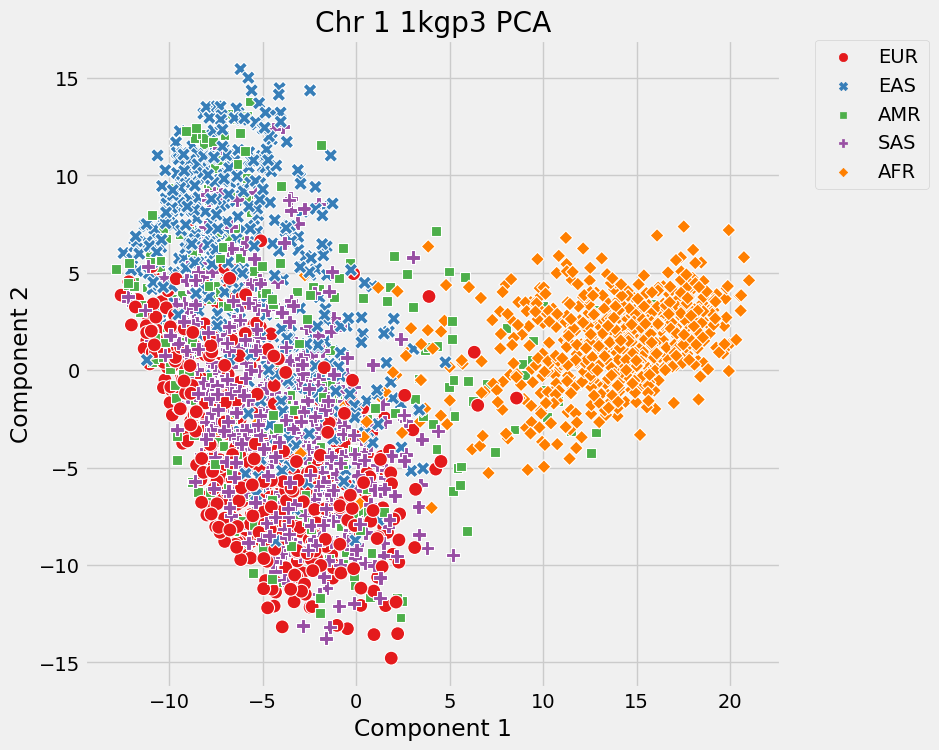

CPU times: user 1.04 s, sys: 186 ms, total: 1.23 s
Wall time: 1.02 s


In [21]:
%%time
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

pca_1 = sns.scatterplot(
    x='Component 1', 
    y='Component 2', 
    data=pc_df, 
    hue='Super Population', 
    style='Super Population',
    palette="Set1",
    s=100
    )
pca_1.set_title('Chr 1 1kgp3 PCA')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0) 
plt.show()

## Create a clustering pipeline

In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score, homogeneity_score, completeness_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline

In [68]:
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=5,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

### Fit 1kgp3 one hot encoded data

In [69]:
%%time
pipe.fit(one_hot_data)%%time
pipe.fit(one_hot_data)

CPU times: user 1min 55s, sys: 1min 43s, total: 3min 38s
Wall time: 29.3 s


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

In [70]:
%%time
preprocessed_data = pipe["preprocessor"].transform(one_hot_data)

predicted_labels = pipe["clusterer"]["kmeans"].labels_


CPU times: user 6.44 s, sys: 2.02 s, total: 8.46 s
Wall time: 6.83 s


In [71]:
%%time
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(meta[['super_pop']].values)
display.clear_output()

CPU times: user 9.03 ms, sys: 7.98 ms, total: 17 ms
Wall time: 8.47 ms


### Compute Performance Metrics
#### Silhouette score 
<p>The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering.</p>
<p>Negative values generally indicate that a sample has been assigned to the wrong cluster</p>
<p>Scores around zero indicate overlapping clusters. </p>
<p>The score is higher when clusters are dense and well separated. </p>
<p>The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters</p>


In [74]:
print(f'Silhouette Scores:\t{silhouette_score(preprocessed_data, predicted_labels):.2f}')

Silhouette Scores:	0.46


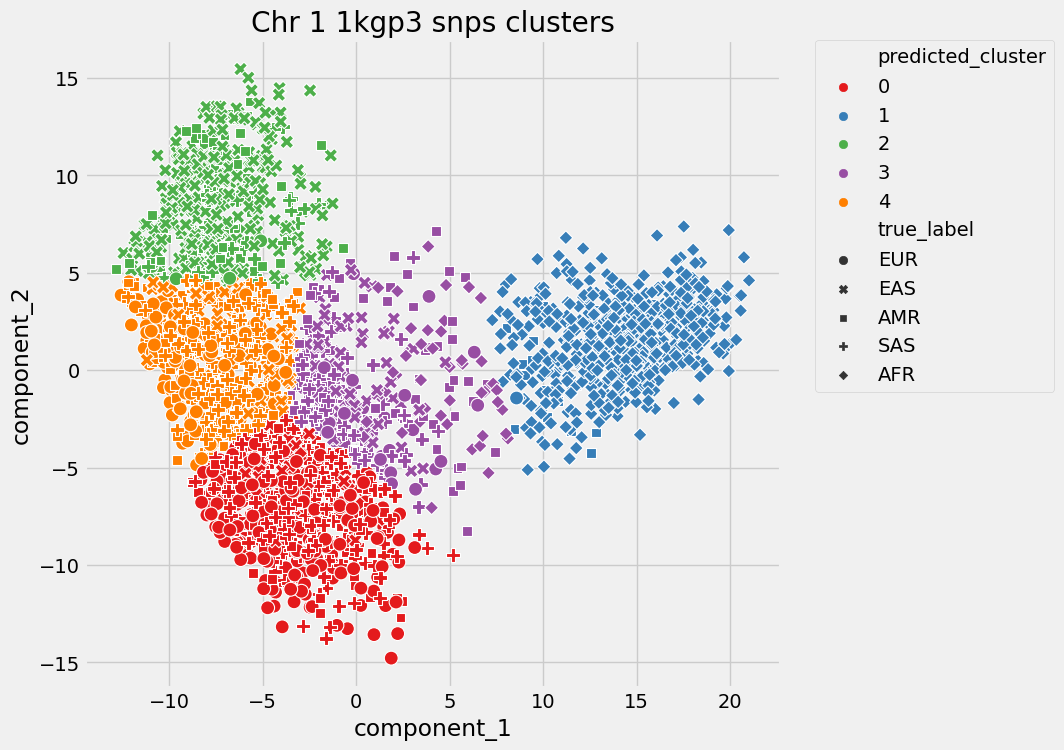

CPU times: user 8.01 s, sys: 2.56 s, total: 10.6 s
Wall time: 8.21 s


In [73]:
%%time
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(one_hot_data),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_

pcadf["true_label"] = label_encoder.inverse_transform(true_labels)


plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    x="component_1",
    y="component_2",
    s=100,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set1",
)

scat.set_title(
    "Chr 1 1kgp3 snps clusters"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

In [29]:
%%time
h3a_data = json.load(open('variants_h3awgs.json'))

CPU times: user 1min 7s, sys: 10.7 s, total: 1min 18s
Wall time: 1min 18s


In [49]:
%%time
h3a_samples = h3a_data[0]['attributes']['samples']["wilson@agvp:h3awgs"]

CPU times: user 13 µs, sys: 0 ns, total: 13 µs
Wall time: 22.4 µs


In [50]:
%%time
h3a_GTs = list(map(lambda y: {y['id']: list(map(lambda x: x['data'][0],y['studies'][0]['samples']))}  ,h3a_data[0]['results']))

CPU times: user 6.33 s, sys: 51.1 ms, total: 6.38 s
Wall time: 6.4 s


In [32]:
len(h3a_GTs)

50000

In [51]:
%%time
h3a_df = pd.DataFrame(map(lambda x: x.values(),h3a_GTs), index=map(lambda x: list(x.keys())[0], h3a_GTs), columns=['GTs'])
h3a_gt_df = pd.DataFrame(h3a_df["GTs"].to_list(), index=h3a_df.index.to_list(), columns=h3a_samples)
h3a_gt_df.head()

CPU times: user 9.5 s, sys: 72 ms, total: 9.57 s
Wall time: 9.6 s


,H3A-7C44F2,H3A-B4DD3C,H3A-31F23C,H3A-D3A6FE,H3A-0BF47F,H3A-252921,H3A-8CE927,H3A-628415,H3A-5FDB78,H3A-D84758,...,H3A-94BDC2,H3A-7390C4,H3A-DF4F02,H3A-027AA9,H3A-AC15C0,H3A-F47357,H3A-A48878,H3A-9CBEDB,H3A-CDA703,H3A-87312B
1:10250:A:C,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0|1,0/0,0/0,...,0/0,0/0,0/0,0/0,1|1,0/0,0/0,0/0,0/0,0/0
1:10445:A:C,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
1:10448:C:A,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
1:10450:T:C,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
1:10451:A:C,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0


In [52]:
%%time
h3a_trans_df = h3a_gt_df.transpose()
h3a_trans_df.head()

CPU times: user 1.54 s, sys: 29.8 ms, total: 1.57 s
Wall time: 1.58 s


,1:10250:A:C,1:10445:A:C,1:10448:C:A,1:10450:T:C,1:10451:A:C,1:10454:C:T,1:10456:T:G,1:10457:A:C,1:10486:G:A,1:10492:C:T,...,1:3136195:C:A,1:3136383:G:A,1:3136419:T:A,1:3136460:G:A,1:3136466:C:T,1:3136592:C:T,1:3136666:T:C,1:3136774:A:G,1:3136858:A:G,1:3136961:G:A
H3A-7C44F2,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
H3A-B4DD3C,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
H3A-31F23C,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
H3A-D3A6FE,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
H3A-0BF47F,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0


In [3]:
h3a_meta = pd.read_table('samples.meta.tsv', index_col='SampleID')

In [5]:
h3a_meta.head()

,Country,EthnolinguisticGroup,Gender,PI,Project,sourcefile
SampleID,,,,,,
H3A-7C44F2,Guinea,Guinea,Female,Fowler,Trypanogen,Trypanogen.tsv
H3A-B4DD3C,Cote D'Ivoire,Cote D'Ivoire,Male,Fowler,Trypanogen,Trypanogen.tsv
H3A-31F23C,Uganda,Uganda,Female,Fowler,Trypanogen,Trypanogen.tsv
H3A-D3A6FE,Uganda,Uganda,Female,Fowler,Trypanogen,Trypanogen.tsv
H3A-0BF47F,Guinea,Guinea,Male,Fowler,Trypanogen,Trypanogen.tsv


In [54]:
%%time
h3a_one_hot = pd.get_dummies(h3a_trans_df)

CPU times: user 1min 15s, sys: 569 ms, total: 1min 16s
Wall time: 1min 16s


In [55]:
%%time
pipe.fit(h3a_one_hot)

CPU times: user 1min 19s, sys: 1min 50s, total: 3min 10s
Wall time: 31.5 s


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

In [56]:
h3a_label_encoder = LabelEncoder()
h3a_true_labels = label_encoder.fit_transform(h3a_meta[['Population']].values)
display.clear_output()

In [57]:
h3a_preprocessed_data = pipe["preprocessor"].transform(h3a_one_hot)

h3a_predicted_labels = pipe["clusterer"]["kmeans"].labels_


In [77]:
print(f'Silhouette Scores:\t{silhouette_score(h3a_preprocessed_data, h3a_predicted_labels):.2f}')

Silhouette Scores:	0.35


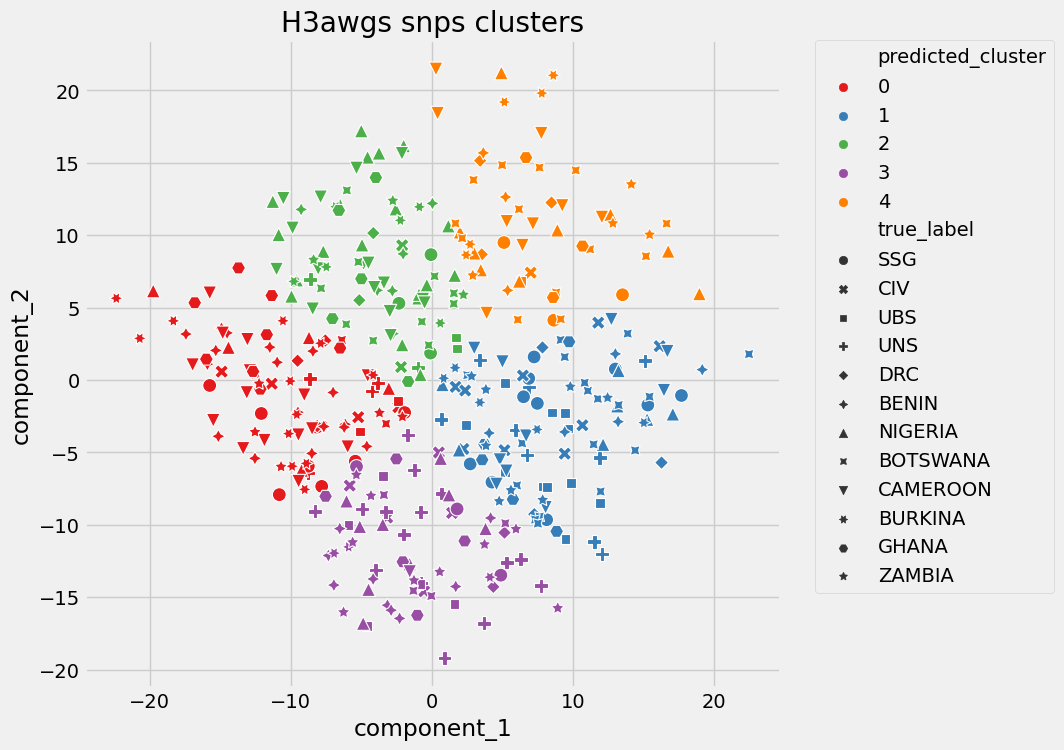

CPU times: user 11.7 s, sys: 2.13 s, total: 13.9 s
Wall time: 11 s


In [59]:
%%time
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(h3a_one_hot),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_

pcadf["true_label"] = label_encoder.inverse_transform(h3a_true_labels)


plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    x="component_1",
    y="component_2",
    s=100,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set1",
)

scat.set_title(
    "H3awgs snps clusters"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

In [26]:
plink_pca = pd.read_table('h3a_wgs.gtypes.ids.unlinked.pca.eigenvec', header=None, sep=' ')
plink_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,H3A-7C44F2,H3A-7C44F2,0.033373,0.015526,-0.002917,0.015452,-0.014030,-0.006095,-0.025227,-0.034085,...,-0.000419,-0.003332,-0.041815,0.011342,-0.003760,0.007103,0.004269,0.002541,-0.002968,-0.001069
1,H3A-B4DD3C,H3A-B4DD3C,0.027655,0.016116,-0.001863,0.008111,-0.008164,-0.003085,-0.009973,-0.014101,...,0.000679,-0.002511,-0.013877,0.003814,-0.000628,0.002712,0.000731,0.002734,0.000040,0.000412
2,H3A-31F23C,H3A-31F23C,0.018038,-0.027256,-0.001985,-0.001412,0.001565,0.001851,0.003934,-0.003564,...,0.000503,-0.004637,-0.016912,0.003065,0.005976,-0.002911,-0.005437,-0.000232,-0.003881,-0.003815
3,H3A-D3A6FE,H3A-D3A6FE,0.075842,-0.153790,0.025752,-0.006336,-0.001917,0.001145,-0.000294,0.012883,...,0.074830,-0.136218,0.013356,-0.002232,0.017492,-0.502869,0.076474,-0.333460,-0.564977,-0.085703
4,H3A-0BF47F,H3A-0BF47F,0.035189,0.015630,-0.002494,0.014578,-0.015668,-0.009254,-0.028234,-0.041214,...,0.000743,-0.009134,-0.047751,0.014126,-0.003256,0.008712,0.004984,0.003880,-0.002702,-0.002163


In [27]:
plink_pca.shape

(386, 22)

In [28]:
plink_pca_df = pd.DataFrame()
plink_pca_df[['sample', 'Component 1', 'Component 2']] = plink_pca[[1,2,3]]

In [29]:
plink_pca_df.head()

,sample,Component 1,Component 2
0,H3A-7C44F2,0.033373,0.015526
1,H3A-B4DD3C,0.027655,0.016116
2,H3A-31F23C,0.018038,-0.027256
3,H3A-D3A6FE,0.075842,-0.153790
4,H3A-0BF47F,0.035189,0.015630


In [30]:
plink_pca_df[['Population']] = h3a_meta[['Population']].values
plink_pca_df.head()

,sample,Component 1,Component 2,Population
0,H3A-7C44F2,0.033373,0.015526,SSG
1,H3A-B4DD3C,0.027655,0.016116,CIV
2,H3A-31F23C,0.018038,-0.027256,UBS
3,H3A-D3A6FE,0.075842,-0.153790,UNS
4,H3A-0BF47F,0.035189,0.015630,SSG


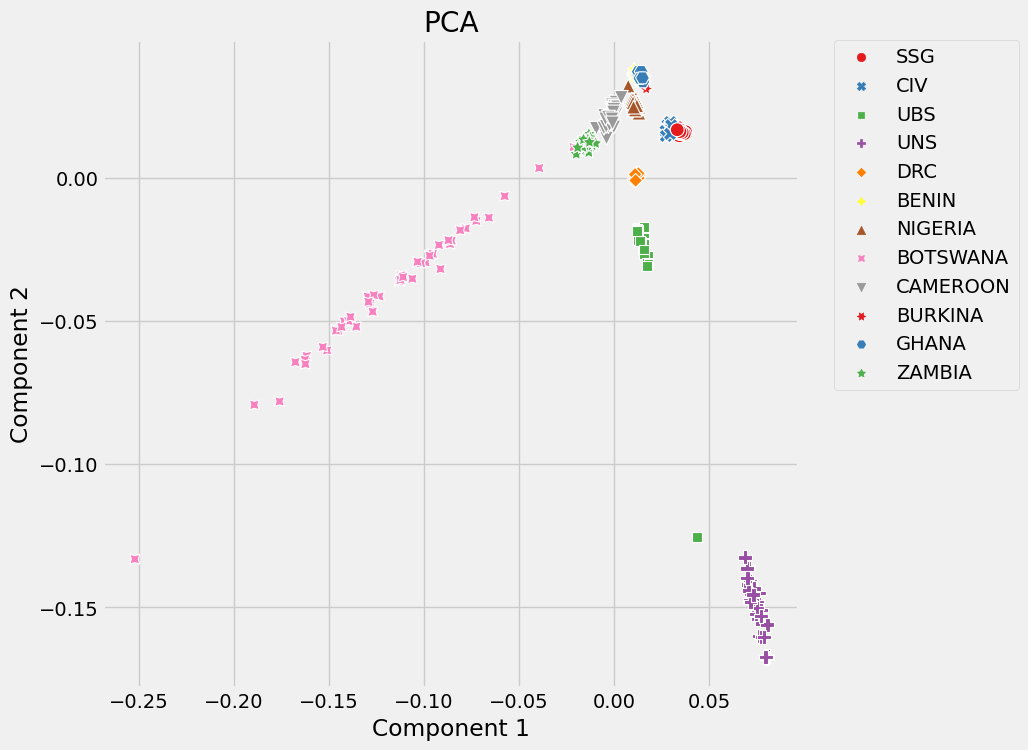

In [57]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

pca_1 = sns.scatterplot(
    x='Component 1', 
    y='Component 2', 
    data=plink_pca_df, 
    hue='Population', 
    style='Population',
    palette="Set1",
    s=100
    )
pca_1.set_title('PCA')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0) 
plt.show()

In [29]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

In [4]:
clusters_df = pd.read_table('cluster.mds', sep='\s+', engine='python')
clusters_df.head()

,FID,IID,SOL,C1,C2,C3,C4
0,H3A-7C44F2,H3A-7C44F2,0,-0.003968,-0.001551,0.002899,-0.000691
1,H3A-B4DD3C,H3A-B4DD3C,0,-0.003604,-0.001666,0.002312,-0.000604
2,H3A-31F23C,H3A-31F23C,0,-0.004479,0.001481,0.001113,0.002382
3,H3A-D3A6FE,H3A-D3A6FE,1,-0.006469,0.001749,-0.003797,-0.001111
4,H3A-0BF47F,H3A-0BF47F,0,-0.003989,-0.001635,0.003124,-0.001167


In [5]:
clusters_df[['Country', 'EthnolinguisticGroup']] = h3a_meta[['Country', "EthnolinguisticGroup"]].values

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


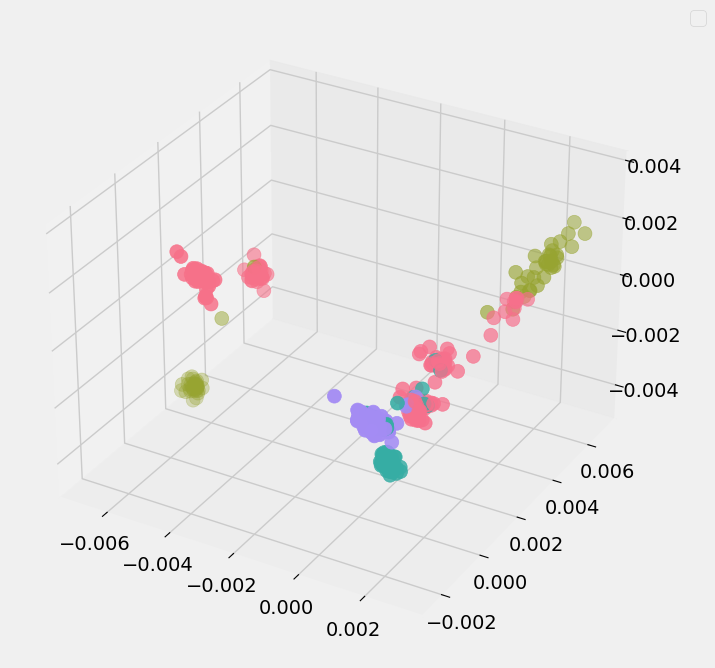

In [33]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))
ax = plt.axes (projection='3d')

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

pca_1 = ax.scatter3D(
    clusters_df.rename(columns={'SOL':'Clusters'}).iloc[:,3], 
    clusters_df.rename(columns={'SOL':'Clusters'}).iloc[:,4], 
    clusters_df.rename(columns={'SOL':'Clusters'}).iloc[:,5],
    # data=clusters_df.rename(columns={'SOL':'Clusters'}), 
    # hue='Clusters', 
    # style='Country',
    # palette="Set1",
    s=100,
    cmap=cmap,
    c=clusters_df.rename(columns={'SOL':'Clusters'}).iloc[:,2],
    # h='Clusters'
    )
# pca_1.set_title('Clusters')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.savefig('clusters.png', bbox_inches='tight')
plt.show()